In [42]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [46]:
customers.sample(5)

,CustomerID,CustomerName,Region,SignupDate
67,C0068,Mark Cox,North America,2023-04-04
19,C0020,Mr. Manuel Conway,North America,2024-06-11
24,C0025,Gregory Odom,South America,2022-07-04
13,C0014,Deborah Wilcox,Europe,2024-06-22
10,C0011,Bryan Mathews,South America,2022-12-12


In [48]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [50]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [52]:
print(customers['Region'].value_counts())

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [54]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [56]:
total_revenue = transactions['TotalValue'].sum()
average_transaction_value = transactions['TotalValue'].mean()
print(f"Total revenue generated: {total_revenue:.2f} units")
print(f"Average transaction value: {average_transaction_value:.2f} units")

Total revenue generated: 689995.56 units
Average transaction value: 690.00 units


In [58]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

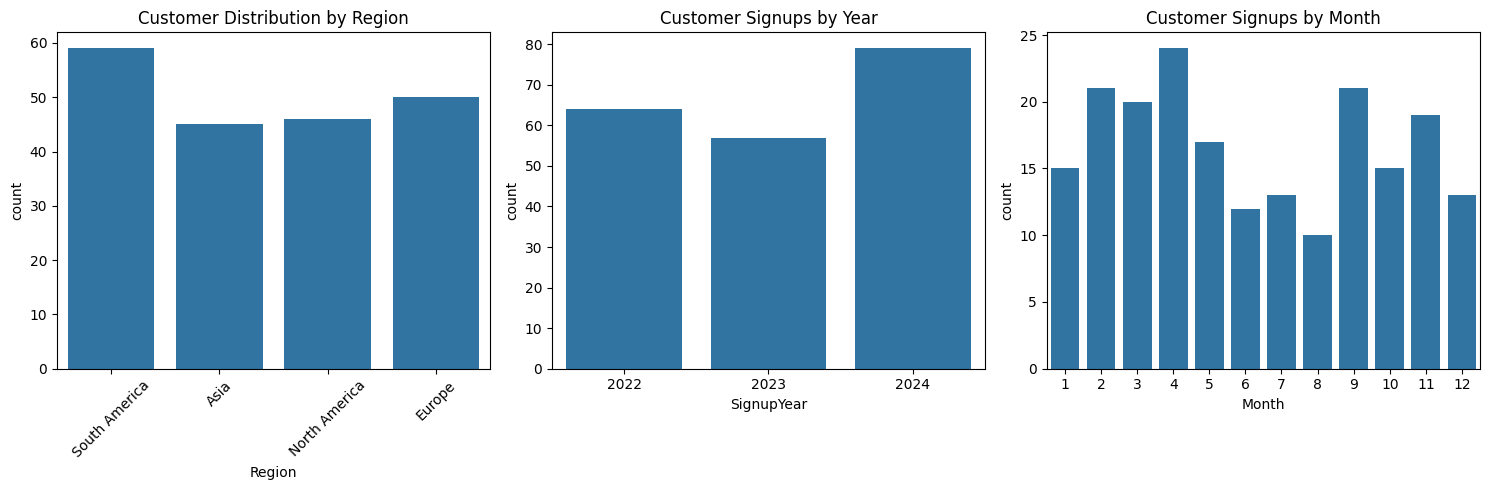

In [62]:
# Customer analysis visualizations
plt.figure(figsize=(15, 5))

#Customer distribution by region
plt.subplot(1, 3, 1)
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)

#Signup trends by year
plt.subplot(1, 3, 2)
customers['SignupYear'] = customers['SignupDate'].dt.year
sns.countplot(data=customers, x='SignupYear')
plt.title('Customer Signups by Year')

#Signup trends by month
plt.subplot(1, 3, 3)
customers['SignupMonth'] = customers['SignupDate'].dt.month
sns.countplot(data=customers, x='SignupMonth')
plt.title('Customer Signups by Month')
plt.xlabel('Month')

plt.tight_layout()
plt.show()

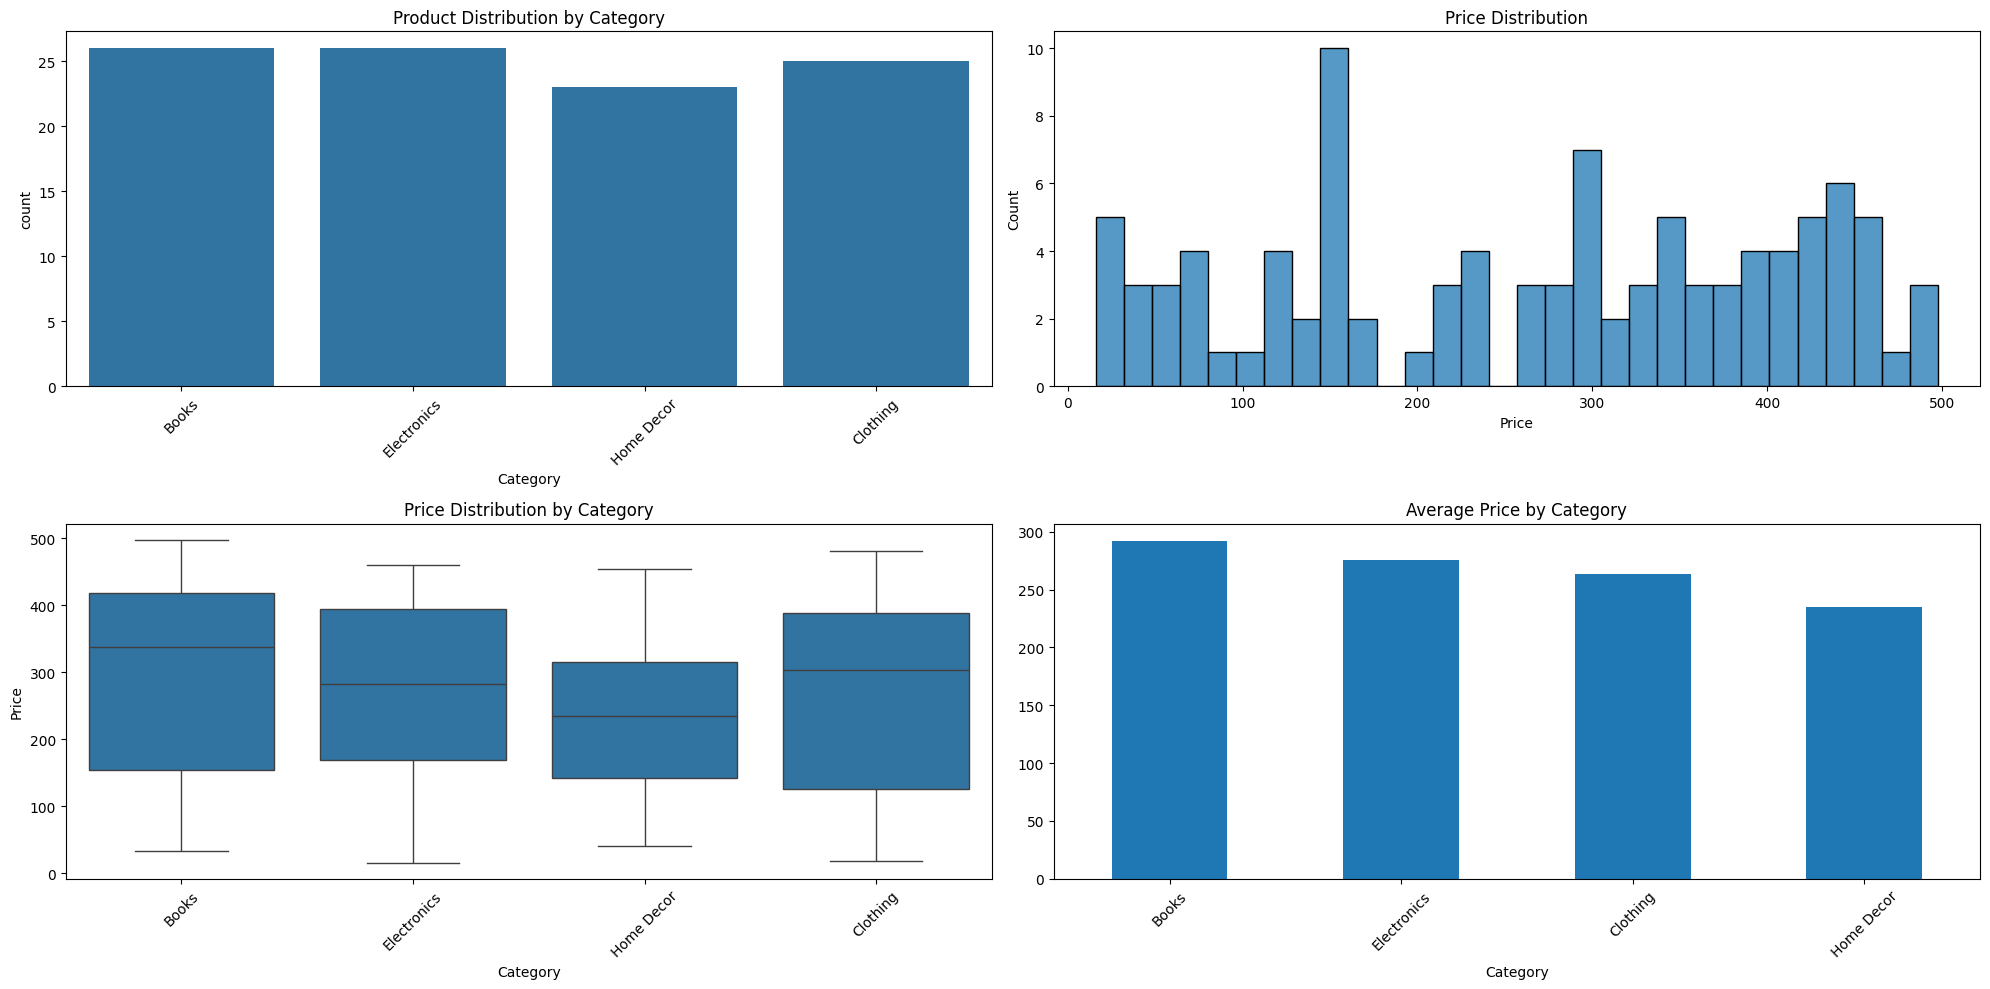

In [64]:
# Product analysis visualizations
plt.figure(figsize=(20, 10))

#Product Category Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=products, x='Category')
plt.title('Product Distribution by Category')
plt.xticks(rotation=45)

#Price Distribution
plt.subplot(2, 2, 2)
sns.histplot(data=products, x='Price', bins=30)
plt.title('Price Distribution')

#Box Plot of Prices by Category
plt.subplot(2, 2, 3)
sns.boxplot(data=products, x='Category', y='Price')
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)

#Average Price by Category
avg_price_by_category = products.groupby('Category')['Price'].mean().sort_values(ascending=False)
plt.subplot(2, 2, 4)
avg_price_by_category.plot(kind='bar')
plt.title('Average Price by Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

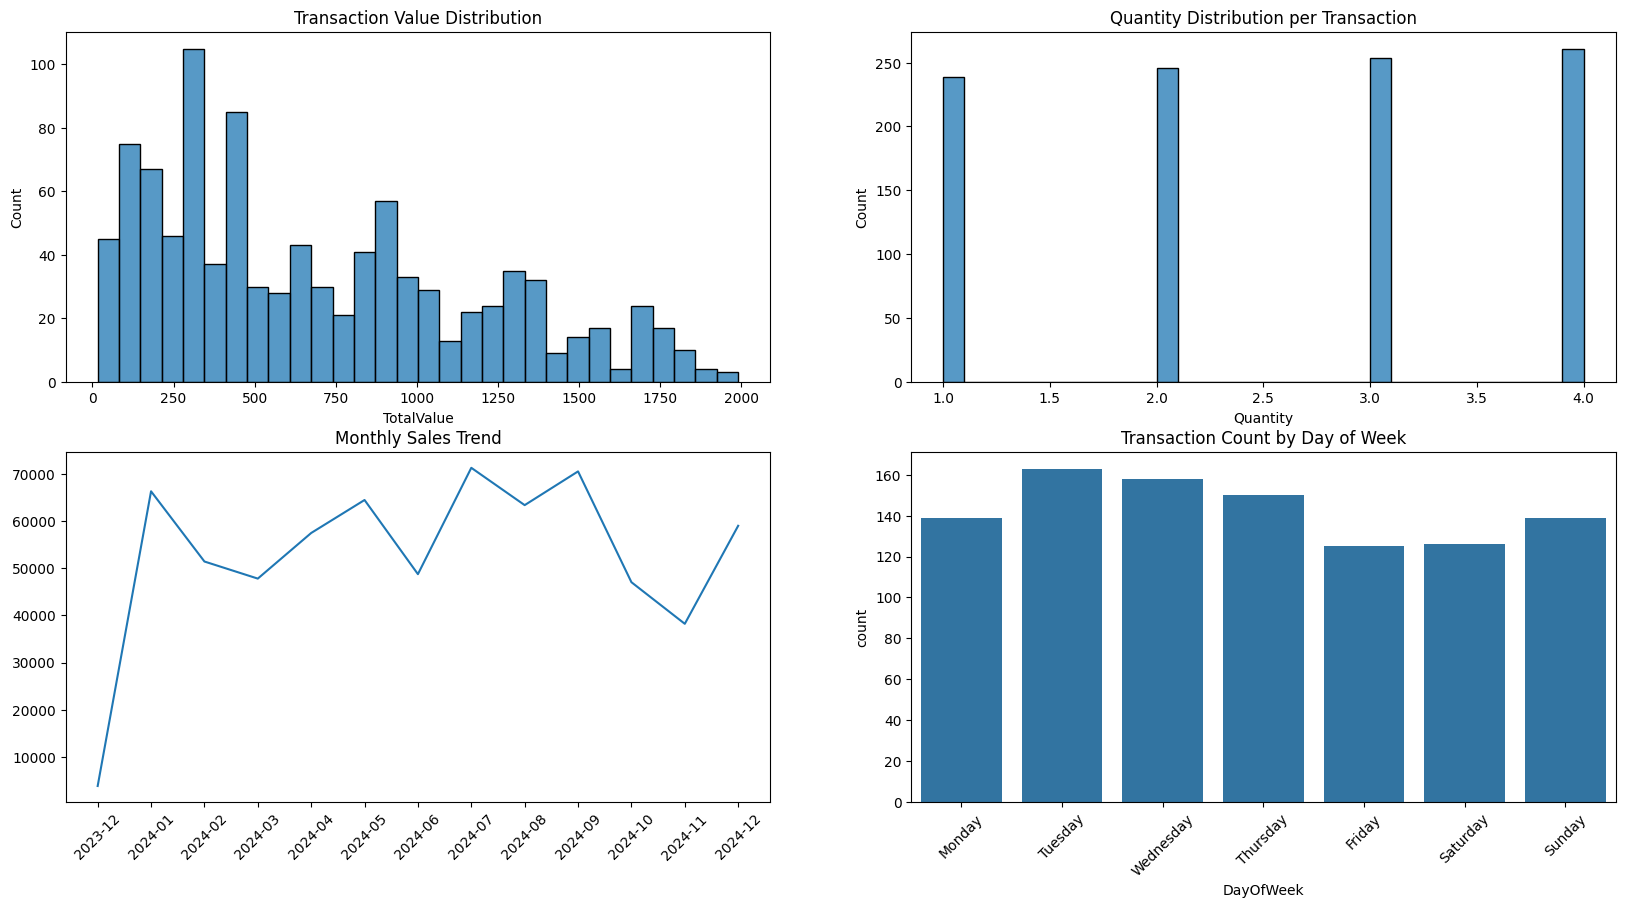

In [66]:
# transaction analysis
plt.figure(figsize=(20, 10))

#Transaction Value Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=transactions, x='TotalValue', bins=30)
plt.title('Transaction Value Distribution')

#Quantity Distribution

plt.subplot(2, 2, 2)
sns.histplot(data=transactions, x='Quantity', bins=30)
plt.title('Quantity Distribution per Transaction')

#Transaction Trends Over Time
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

plt.subplot(2, 2, 3)
plt.plot(monthly_sales['YearMonth'], monthly_sales['TotalValue'])
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)

#Transaction Count by Day of Week
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.day_name()
plt.subplot(2, 2, 4)
sns.countplot(data=transactions, x='DayOfWeek', 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transaction Count by Day of Week')
plt.xticks(rotation=45)
